# SALES PREDICTION USING PYTHON

# 1. Importing the Required Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_absolute_error, mean_squared_error,r2_score

# 2. Loading the Sales Dataset

In [82]:
# Loading the Sales Dataset

df = pd.read_csv('/content/advertising.csv')  # Ensure 'train.csv' is in your working directory
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 3. Exploratory Data Analysis(EDA)

In [83]:
# Info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [84]:
# Total null values for every columns

df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


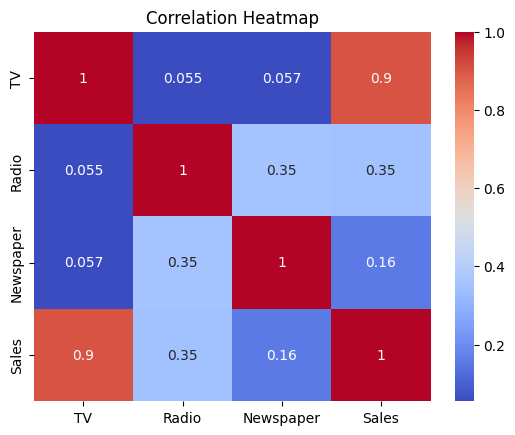

In [85]:
# Checking the correlation between the columns

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

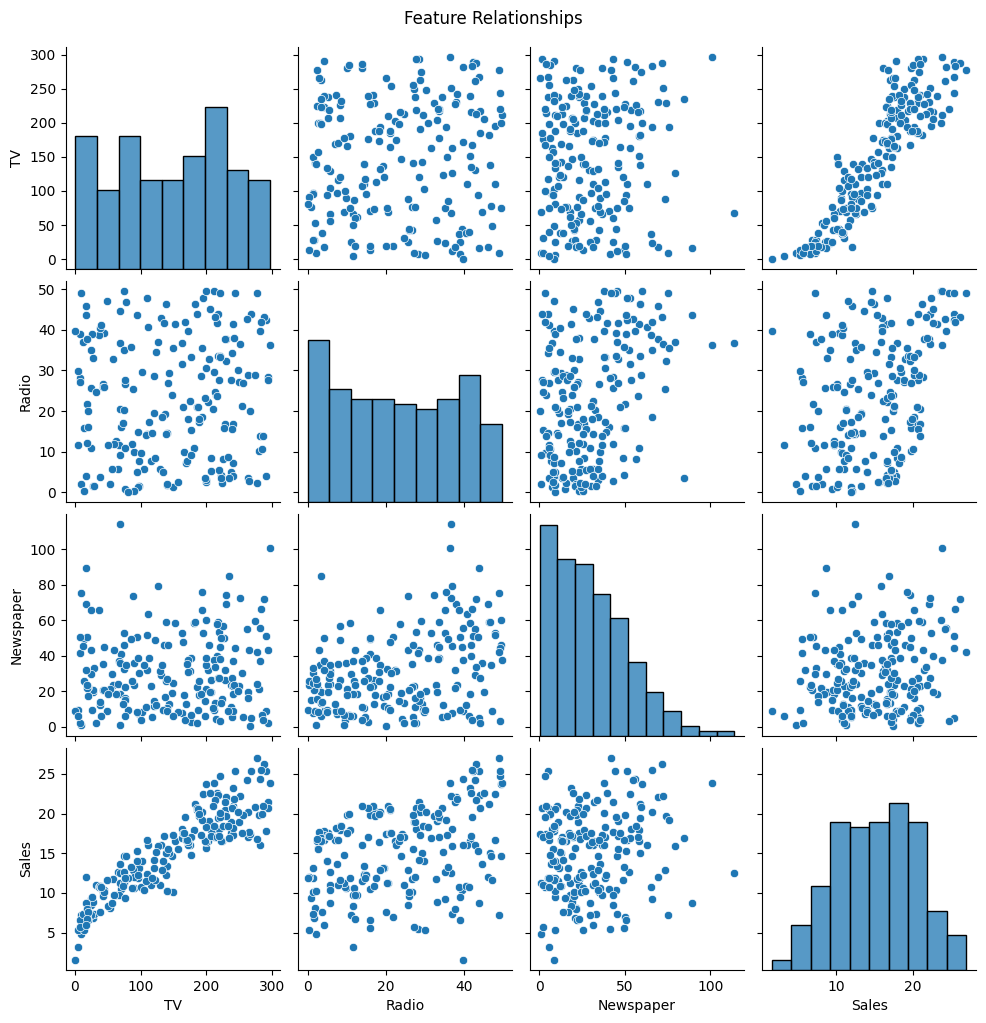

In [86]:
# Pairwise Relationship between the numeric columns

sns.pairplot(df)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

# 4. Data Cleaning

In [87]:
# The data is already clean with no missing values.

# 5. Model

In [88]:
# Separating the dataset into features and targeted feature

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [89]:
# ✅ Step 5: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Training the Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 6. Evaluation

In [91]:
# Evaluating using different metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [92]:
# Printing the different metrics

print("\nEvaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)


Evaluation Metrics:
MAE: 1.2748262109549338
MSE: 2.9077569102710896
R2 Score: 0.9059011844150826


In [93]:
# Printing the coefficients and the intercept

print("\nModel Coefficients:")
print("Intercept:", model.intercept_)
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)


Model Coefficients:
Intercept: 4.714126402214127
     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337


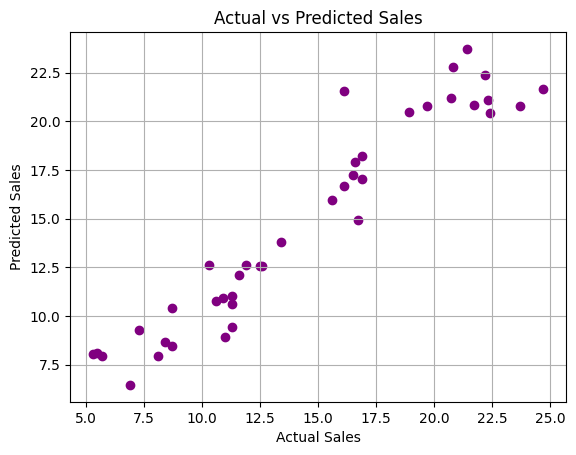

In [94]:
# Showcase teh actual sales V/s predicted Sales

plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()